# 1)	Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán;

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'prog_book.csv'

data = pd.read_csv(filename)
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


In [2]:
data['Reviews'] = data['Reviews'].apply(lambda x : int(x.replace(',','')))
data.describe()

,Rating,Reviews,Number_Of_Pages,Price
count,271.000000,271.000000,271.000000,271.000000
mean,4.067417,185.557196,475.077491,54.541860
std,0.290749,552.122252,306.147492,35.711485
min,3.000000,0.000000,50.000000,9.323529
25%,3.915000,5.500000,289.000000,30.751471
50%,4.100000,35.000000,384.000000,46.317647
75%,4.250000,116.500000,572.500000,67.854412
max,5.000000,5938.000000,3168.000000,235.650000


<Axes: xlabel='Type', ylabel='Price'>

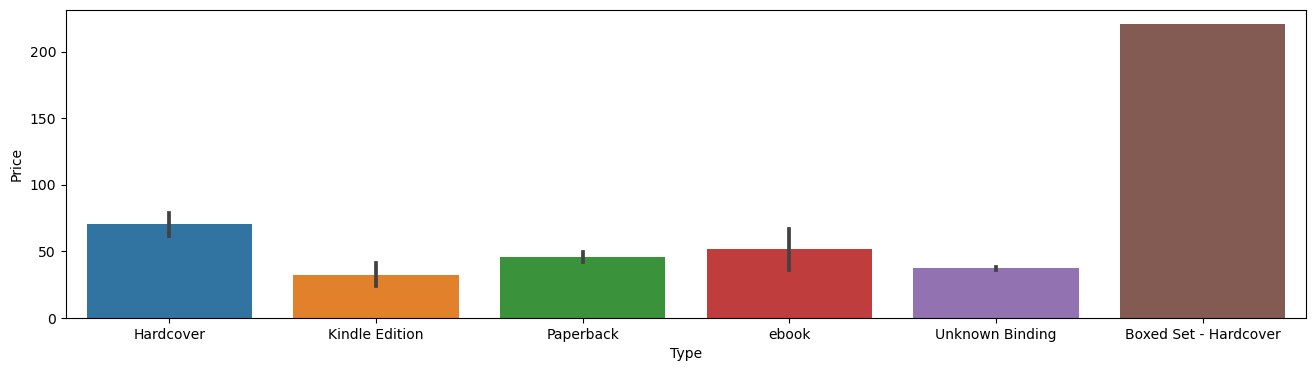

In [3]:
plt.figure(figsize=(16,4))
sns.barplot(x='Type', y='Price', data=data)

<Axes: xlabel='Type', ylabel='Rating'>

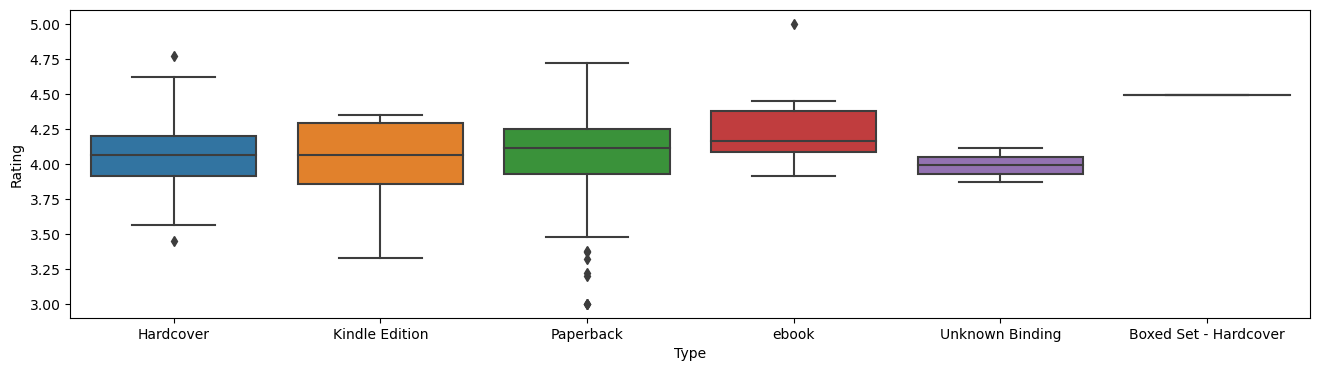

In [4]:
plt.figure(figsize=(16,4))
sns.boxplot(x='Type', y='Rating', data=data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26300\3499501668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

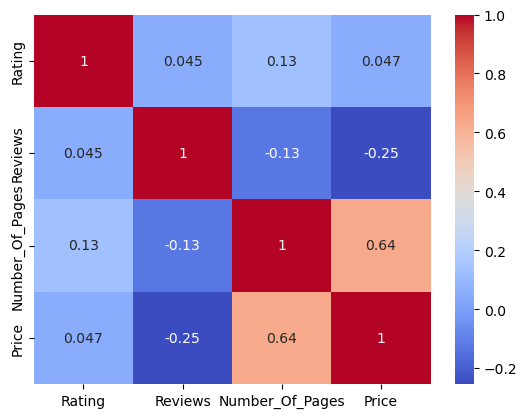

In [5]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

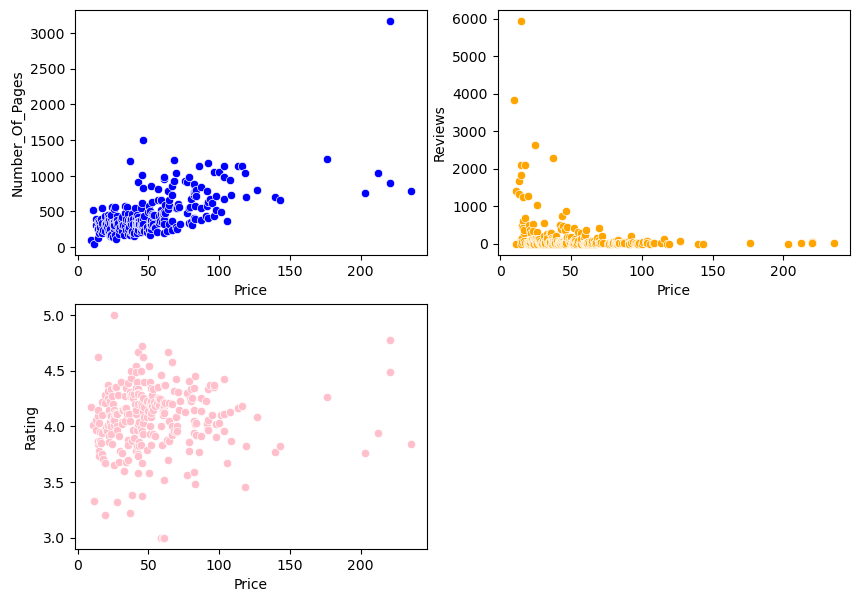

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.scatterplot(data=data, x='Price', y='Number_Of_Pages', ax=axes[0,0], color='blue')
sns.scatterplot(data=data, x='Price', y='Reviews', ax=axes[0,1], color='orange')
sns.scatterplot(data=data, x='Price', y='Rating', ax=axes[1,0], color='pink')
axes[1,1].axis('off')
plt.show()

# (2)Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learning:

	Linear Regression: 

In [7]:
X = data[['Number_Of_Pages', 'Rating', 'Reviews']]
y = np.log2(data['Price'])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model_ln = LinearRegression()
model_ln.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred_ln = model_ln.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_ln = mean_squared_error(y_test, y_pred_ln)
print(f'Mean Squared Error: {mse_ln}')

Mean Squared Error: 0.8477566093711165


	Decision Tree

In [11]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
y_pred_tree = model_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Mean Squared Error: {mse_tree}')

Mean Squared Error: 0.8485983440673818


	Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse_rf}')


Mean Squared Error: 0.4980069852892197


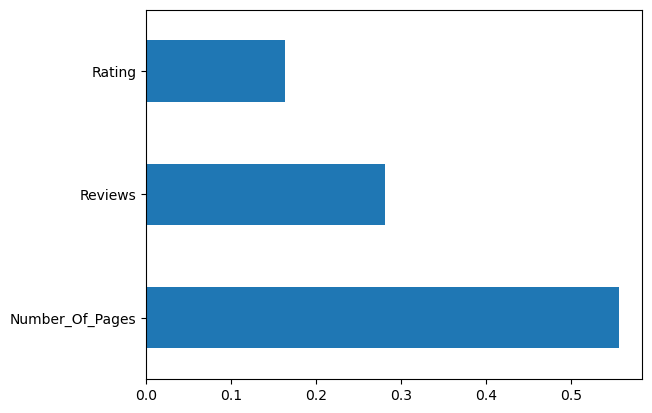

In [15]:
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


# (3)	Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô hình thuộc loại này) để giải quyết bài toán:

	Neural Network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn = Sequential()

model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

In [17]:
model_nn.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50

6/6 [==============================] - 1s 72ms/step - loss: 5424.0659 - val_loss: 343.4228
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 1386.7681 - val_loss: 39.9360
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 277.8671 - val_loss: 33.6868
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 90.6554 - val_loss: 70.9867
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 166.4909 - val_loss: 53.6176
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 134.0087 - val_loss: 27.3496
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 47.4457 - val_loss: 14.7590
Epoch 8/50
6/6 [==============================] - 0s 10ms/step - loss: 12.2938 - val_loss: 13.7672
Epoch 9/50
6/6 [==============================] - 0s 9ms/step - loss: 32.7047 - val_loss: 14.2137
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 21.8042 - val_loss: 12.4424
Epo

In [19]:
y_pred_nn = model_nn.predict(X_test)

mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Mean Squared Error: {mse_nn}')

2/2 [==============================] - 0s 3ms/step
Mean Squared Error: 5.360609084732777


	Reccurent Neural Network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dense(1, activation='linear'))

In [21]:
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
6/6 [==============================] - 1s 59ms/step - loss: 589.4797 - val_loss: 38.7279
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 115.0882 - val_loss: 116.8888
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 64.8946 - val_loss: 13.8020
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 62.8472 - val_loss: 29.2749
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 14.4229 - val_loss: 10.9871
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 24.0917 - val_loss: 8.8438
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 11.2171 - val_loss: 10.3439
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 10.7558 - val_loss: 6.6438
Epoch 9/50
6/6 [==============================] - 0s 9ms/step - loss: 7.1567 - val_loss: 7.7397
Epoch 10/50
6/6 [==============================] - 0s 14ms/step - loss: 6.7035 - val_loss: 6.9776
Epoch 11/50
6/

In [23]:
y_pred_rnn = model_rnn.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'Mean Squared Error: {mse_rnn}')

2/2 [==============================] - 0s 5ms/step
Mean Squared Error: 12.361623888173126


# (4)	Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán:

Cross-Validation 

In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_ln, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -cv_scores

print("Cross-Validation MSE Scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))

Cross-Validation MSE Scores: [1.49094098 0.2314207  0.21672996 0.30628596 1.17193573]
Mean MSE: 0.683462667823796


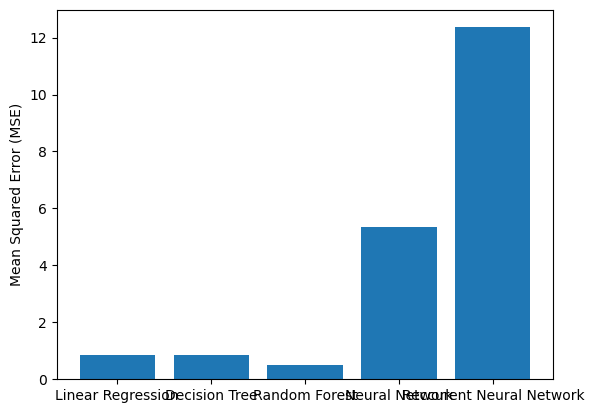

In [25]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network', 'Reccurent Neural Network']
mse_values = [mse_ln, mse_tree, mse_rf, mse_nn, mse_rnn]

plt.bar(models, mse_values)
plt.ylabel('Mean Squared Error (MSE)')
plt.show()